In [1]:
import numpy as np
from scipy.io import matlab
import matplotlib.pyplot as plt

__header__ __version__ __globals__ M1
(451, 161, 400) float64 -0.9007323949209264 1.0


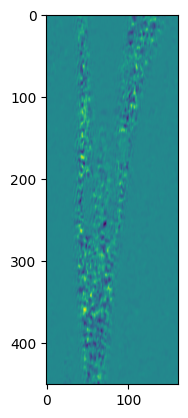

In [2]:
data = matlab.loadmat('data/BD-RPCA/simu_conv.mat')
print(*data.keys())
M1 = data['M1']
print(M1.shape, M1.dtype, np.min(M1), np.max(M1))
r,c,l = M1.shape
M = M1.reshape((-1, l))

plt.imshow(np.sum(M1, axis=2) / l)

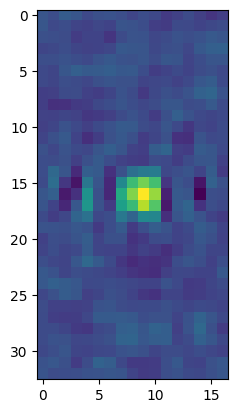

In [3]:
data = matlab.loadmat("data/BD-RPCA/psf_simu.mat")
psf = data['psf']
plt.imshow(psf)

In [4]:
m_hh, n_hh = psf.shape
1-np.array([np.floor((m_hh+1)/2), np.floor((n_hh+1)/2)])

array([-16.,  -8.])

In [5]:
from numpy.fft import fft2, fftshift


m_hh, n_hh = psf.shape
shift_h = np.zeros((r*c, l))
shift_h[:m_hh, :n_hh] = psf
H = fft2(np.roll(shift_h, 1-np.array([np.floor((m_hh+1)/2), np.floor((n_hh+1)/2)], dtype=int)))
# plt.imshow(np.abs(H))

In [6]:
from scipy.signal import hilbert2

def dopplerplot(X, test=False):
    _,_,l = X.shape

    amp = 35
    pw = 1/l * np.sum(np.abs(X)**2, axis=2)
    pwtd = pw/np.max(pw)
    pwtd1 = np.maximum(pwtd, 10**(-amp/10))
    log_pwtd = 10 * np.log10(pwtd1)

    plt.xlabel('N_X [nb]')
    plt.ylabel('N_Z [nb]')
    cb = plt.imshow(log_pwtd)
    plt.colorbar(cb)

def rf2bmode(RF, increase=0):
    res = np.copy(RF)
    for i in range(RF.shape[2]):
        tmp = 20 * np.log10(np.abs(hilbert2(RF[:,:,i]))+increase)
        tmp -= np.min(tmp)
        bmax = np.max(tmp)
        res[:,:,i] = 255 * tmp/bmax

In [7]:
# Fig 1

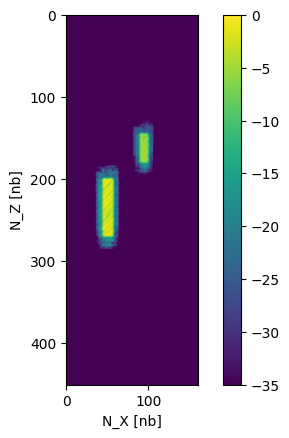

In [9]:
# Fig 2a

seuil_tissu = 2
seuil_bruit = 15

Mnew = M.T @ M
V, D2, Vt = np.linalg.svd(Mnew)
D = np.sqrt(D2)
U = M @ V / D

f = np.ones((l,))
f[:seuil_tissu] = 0
f[seuil_bruit:] = 0
If = np.diag(f)
Mf = M @ V @ If @ V.T
Mfinal = Mf.reshape((r, c, l))

dopplerplot(Mfinal)

mu=0.011133200893013477, lamda=0.0037110669643378256, tol=5.567905584287633e-05


  2%|▏         | 1/50 [00:12<10:10, 12.45s/it]

err=170.40432853628946


  4%|▍         | 2/50 [00:24<09:39, 12.07s/it]

err=80.94192036307355


  6%|▌         | 3/50 [00:36<09:28, 12.10s/it]

err=52.260980553670436


  8%|▊         | 4/50 [00:49<09:42, 12.66s/it]

err=39.84021991707622


 10%|█         | 5/50 [01:03<09:45, 13.01s/it]

err=32.43684995476075


 12%|█▏        | 6/50 [01:15<09:15, 12.62s/it]

err=27.306277939773018


 14%|█▍        | 7/50 [01:24<08:09, 11.39s/it]

err=23.52077020255083


 16%|█▌        | 8/50 [01:31<06:58,  9.97s/it]

err=20.603063958871456


 18%|█▊        | 9/50 [01:38<06:09,  9.02s/it]

err=18.245261452995887


 20%|██        | 10/50 [01:51<06:58, 10.47s/it]

err=16.320059302761585


 22%|██▏       | 11/50 [01:57<05:52,  9.03s/it]

err=14.749247387227282


 24%|██▍       | 12/50 [02:02<04:59,  7.88s/it]

err=13.429101619141564


 26%|██▌       | 13/50 [02:09<04:34,  7.41s/it]

err=12.291469854813299


 28%|██▊       | 14/50 [02:14<04:07,  6.86s/it]

err=11.326996876687613


 30%|███       | 15/50 [02:20<03:44,  6.41s/it]

err=10.499131550944366


 32%|███▏      | 16/50 [02:25<03:30,  6.18s/it]

err=9.769671036554788


 34%|███▍      | 17/50 [02:31<03:19,  6.05s/it]

err=9.118141535406924


 36%|███▌      | 18/50 [02:36<03:05,  5.78s/it]

err=8.536271676103052


 38%|███▊      | 19/50 [02:42<03:02,  5.87s/it]

err=8.014734611462602


 40%|████      | 20/50 [02:51<03:24,  6.80s/it]

err=7.544122008141383


 42%|████▏     | 21/50 [02:57<03:08,  6.51s/it]

err=7.118255036485941


 44%|████▍     | 22/50 [03:03<02:56,  6.31s/it]

err=6.73068388053868


 46%|████▌     | 23/50 [03:10<02:56,  6.54s/it]

err=6.3798097943787795


 48%|████▊     | 24/50 [03:18<03:01,  6.98s/it]

err=6.059850996919637


 50%|█████     | 25/50 [03:25<02:56,  7.04s/it]

err=5.766143359343845


 52%|█████▏    | 26/50 [03:32<02:49,  7.08s/it]

err=5.497097707524483


 54%|█████▍    | 27/50 [03:39<02:41,  7.01s/it]

err=5.249332412273811


 56%|█████▌    | 28/50 [03:46<02:32,  6.92s/it]

err=5.016541973751719


 58%|█████▊    | 29/50 [03:53<02:24,  6.89s/it]

err=4.800906999689797


 60%|██████    | 30/50 [03:59<02:13,  6.68s/it]

err=4.599517049454851


 62%|██████▏   | 31/50 [04:05<02:05,  6.60s/it]

err=4.4127242033832825


 64%|██████▍   | 32/50 [04:13<02:04,  6.94s/it]

err=4.237968314355139


 66%|██████▌   | 33/50 [04:20<02:00,  7.06s/it]

err=4.075684868032649


 68%|██████▊   | 34/50 [04:27<01:51,  6.96s/it]

err=3.925869207793683


 70%|███████   | 35/50 [04:40<02:11,  8.76s/it]

err=3.784993990810635


 72%|███████▏  | 36/50 [04:49<02:05,  8.94s/it]

err=3.650399486743245


 74%|███████▍  | 37/50 [04:56<01:48,  8.36s/it]

err=3.5236793126145907


 76%|███████▌  | 38/50 [05:05<01:39,  8.30s/it]

err=3.4041364711257334


 78%|███████▊  | 39/50 [05:12<01:27,  7.97s/it]

err=3.292199946644626


 80%|████████  | 40/50 [05:18<01:15,  7.52s/it]

err=3.184617348528547


 82%|████████▏ | 41/50 [05:24<01:03,  7.06s/it]

err=3.08421809797163


 84%|████████▍ | 42/50 [05:30<00:54,  6.79s/it]

err=2.987859268618172


 86%|████████▌ | 43/50 [05:37<00:47,  6.73s/it]

err=2.8971803298857


 88%|████████▊ | 44/50 [05:44<00:41,  6.94s/it]

err=2.8110593159713146


 90%|█████████ | 45/50 [05:52<00:36,  7.22s/it]

err=2.7296889497882852


 92%|█████████▏| 46/50 [06:00<00:29,  7.46s/it]

err=2.6526709536996433


 94%|█████████▍| 47/50 [06:09<00:23,  7.78s/it]

err=2.5785939191622473


 96%|█████████▌| 48/50 [06:21<00:18,  9.14s/it]

err=2.5072043891454827


 98%|█████████▊| 49/50 [06:28<00:08,  8.52s/it]

err=2.438985149442891


100%|██████████| 50/50 [06:42<00:00,  8.06s/it]


err=2.3732754198834876


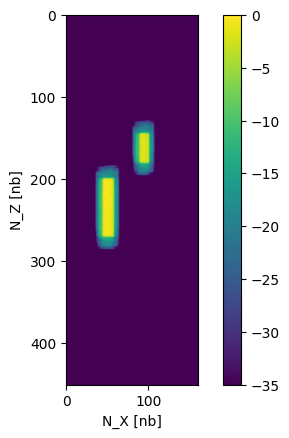

In [ ]:
# fig 2b
from bdrpca.rpca import RPCA


lamda = 3 / np.sqrt(np.maximum(r*c, l))
fit = RPCA.fit(M, lamda, iter_print=1)
Mfinale = fit.S.reshape((r,c,l))
dopplerplot(Mfinale)

  2%|▏         | 1/50 [00:26<21:20, 26.13s/it]

i=0	err1=0.677427243832807	err2=0.4323278350509843	rankT=0	cardS=1


  4%|▍         | 2/50 [01:05<27:02, 33.81s/it]

i=1	err1=0.677427243832807	err2=0.4323278350509843	rankT=0	cardS=1


  4%|▍         | 2/50 [01:13<29:16, 36.60s/it]


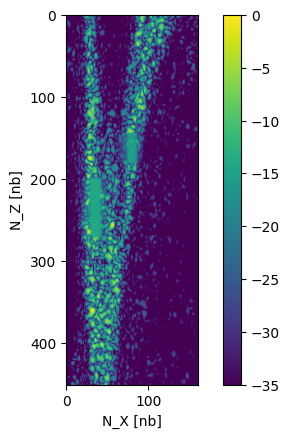

In [7]:
# fig 2c
from bdrpca.drpca import DRPCA

lamda = 3 / np.sqrt(np.maximum(r*c, l))
drpca = DRPCA(lam=lamda)
T, S = drpca(M, H)
Mfinale = S.reshape((r,c,l))
dopplerplot(Mfinale)